In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor,  plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [5]:
df = pd.read_csv("final_data.csv")
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [9]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [11]:
# Take a look at the shape of the dataframe
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.')

There are 10754 rows and 22 columns in the dataset.


In [13]:
# Understanding the datatypes
print(df.dtypes.value_counts())

float64    9
int64      9
object     4
Name: count, dtype: int64


In [15]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [17]:
df['position_encoded'].value_counts()

position_encoded
2    3528
3    3095
4    2902
1    1229
Name: count, dtype: int64

In [19]:
df['winger'].value_counts()

winger
0    7447
1    3307
Name: count, dtype: int64

In [21]:
df['position'].value_counts()

position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64

In [23]:
# As we all know pricing goalkeepers are much different than players
# We will drop GK from the dataset and clean_sheets / goals conceded column as well
df = df[df['position'] != 'Goalkeeper']
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.0,0.0,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.0,0.0,5031,238,51,21,40000000,80000000,2,0
5,/harry-maguire/profil/spieler/177907,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,...,0.0,0.0,4762,148,27,1,25000000,70000000,2,0
6,/victor-lindelof/profil/spieler/184573,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,...,0.0,0.0,5471,95,19,10,15000000,35000000,2,0
7,/phil-jones/profil/spieler/117996,Manchester United,Phil Jones,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,...,0.0,0.0,416,932,169,7,2000000,20000000,2,0


In [25]:
df1 = df.drop(['player', 'clean sheets', 'goals conceded'], axis=1)
df1.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0000,0.0,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0000,0.0,5031,238,51,21,40000000,80000000,2,0
5,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,0.0189,0.0,4762,148,27,1,25000000,70000000,2,0
6,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,0.0000,0.0,5471,95,19,10,15000000,35000000,2,0
7,Manchester United,Phil Jones,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,0.0000,0.0,416,932,169,7,2000000,20000000,2,0


In [27]:
df1['position'].unique()

array(['Defender Centre-Back', 'Defender Left-Back',
       'Defender Right-Back', 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield',
       'Attack-LeftWinger', 'Attack-RightWinger', 'Attack Centre-Forward',
       'midfield-RightMidfield', 'midfield-LeftMidfield',
       'Attack-SecondStriker', 'midfield', 'Attack', 'Defender'],
      dtype=object)

In [29]:
df1.isna().sum()
# there is no null value in the dataset

team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

<Figure size 1200x800 with 0 Axes>

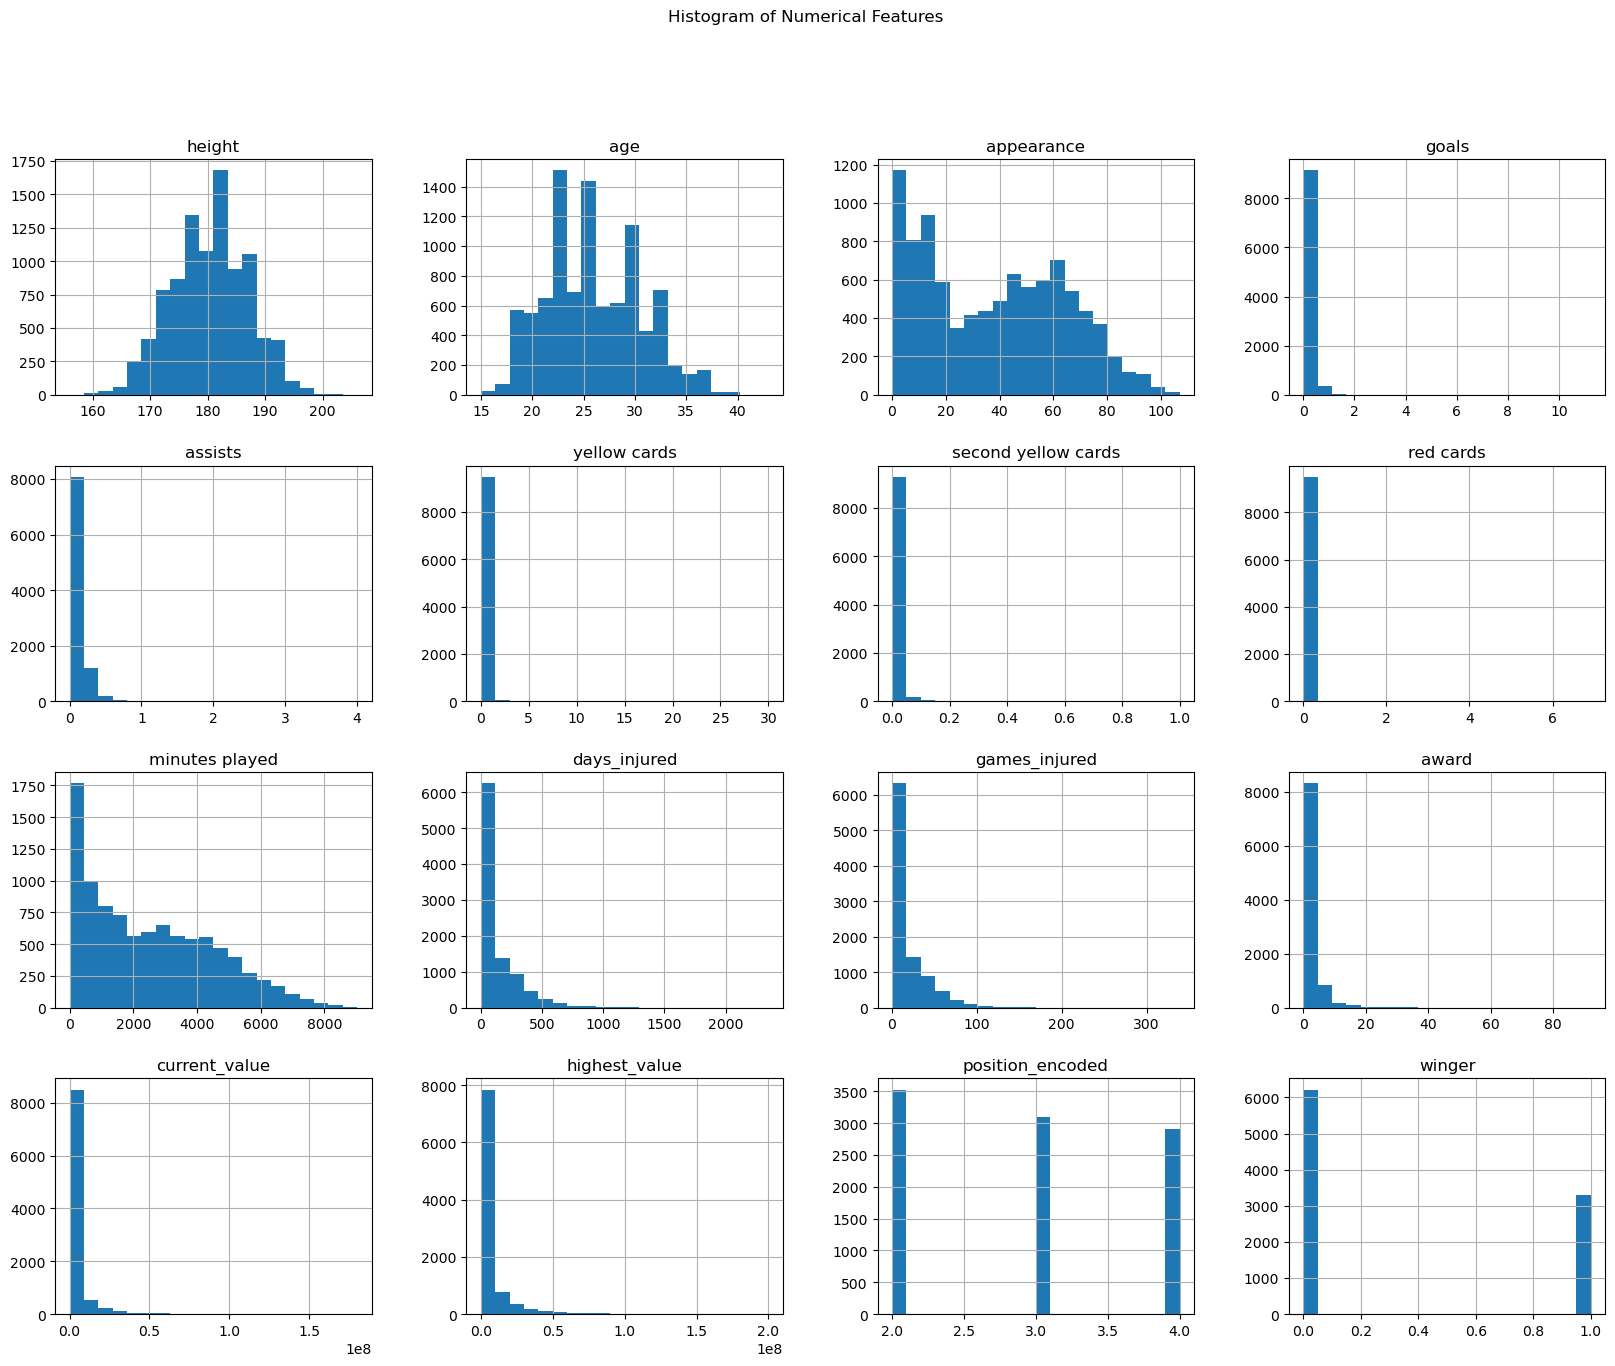

In [31]:
# visualize the distribution of numerical features
plt.figure(figsize=(12, 8))
df1.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histogram of Numerical Features')
plt.show()

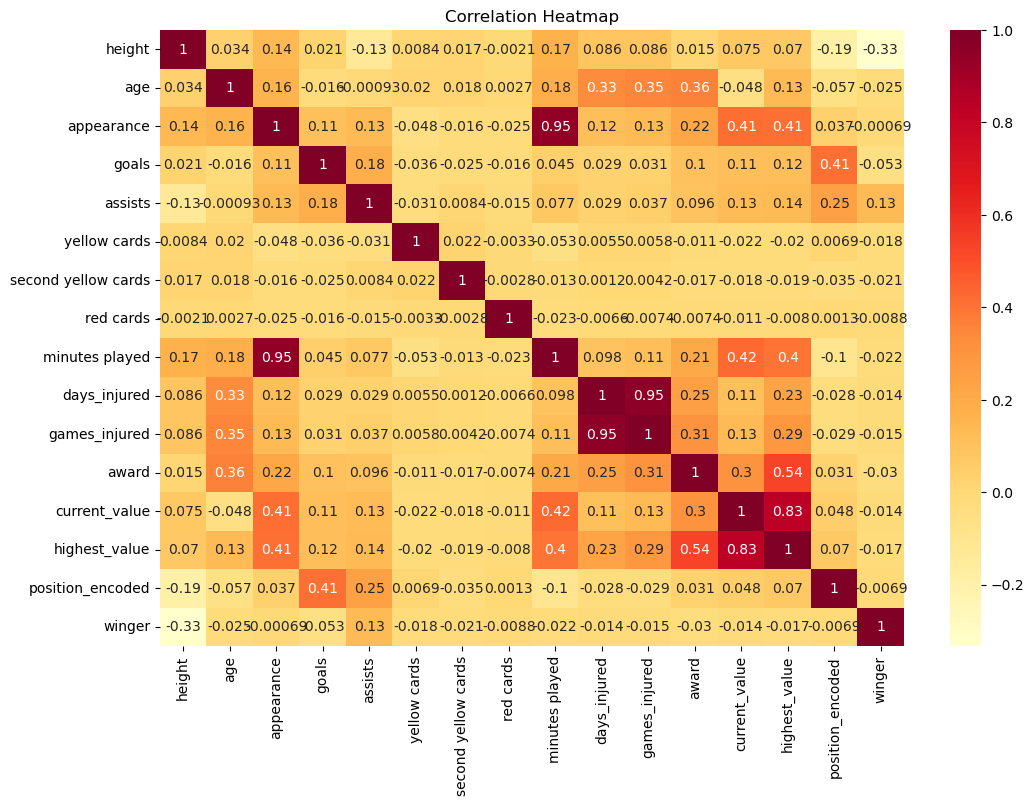

In [35]:
# Select only numeric columns for correlation analysis
numeric_df1 = df1.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap for numeric data only
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df1.corr(), annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()


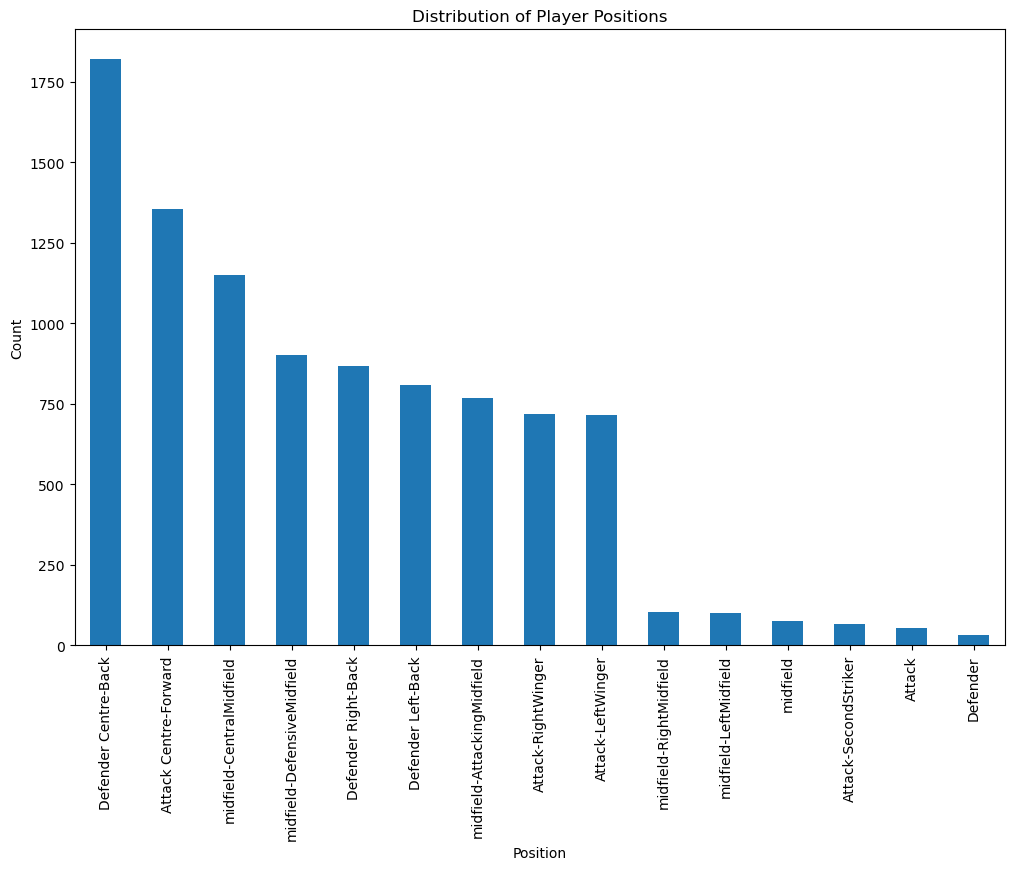

In [37]:
# 5. Visualize the distribution of categorical features
plt.figure(figsize=(12, 8))
df1['position'].value_counts().plot(kind='bar')
plt.title('Distribution of Player Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

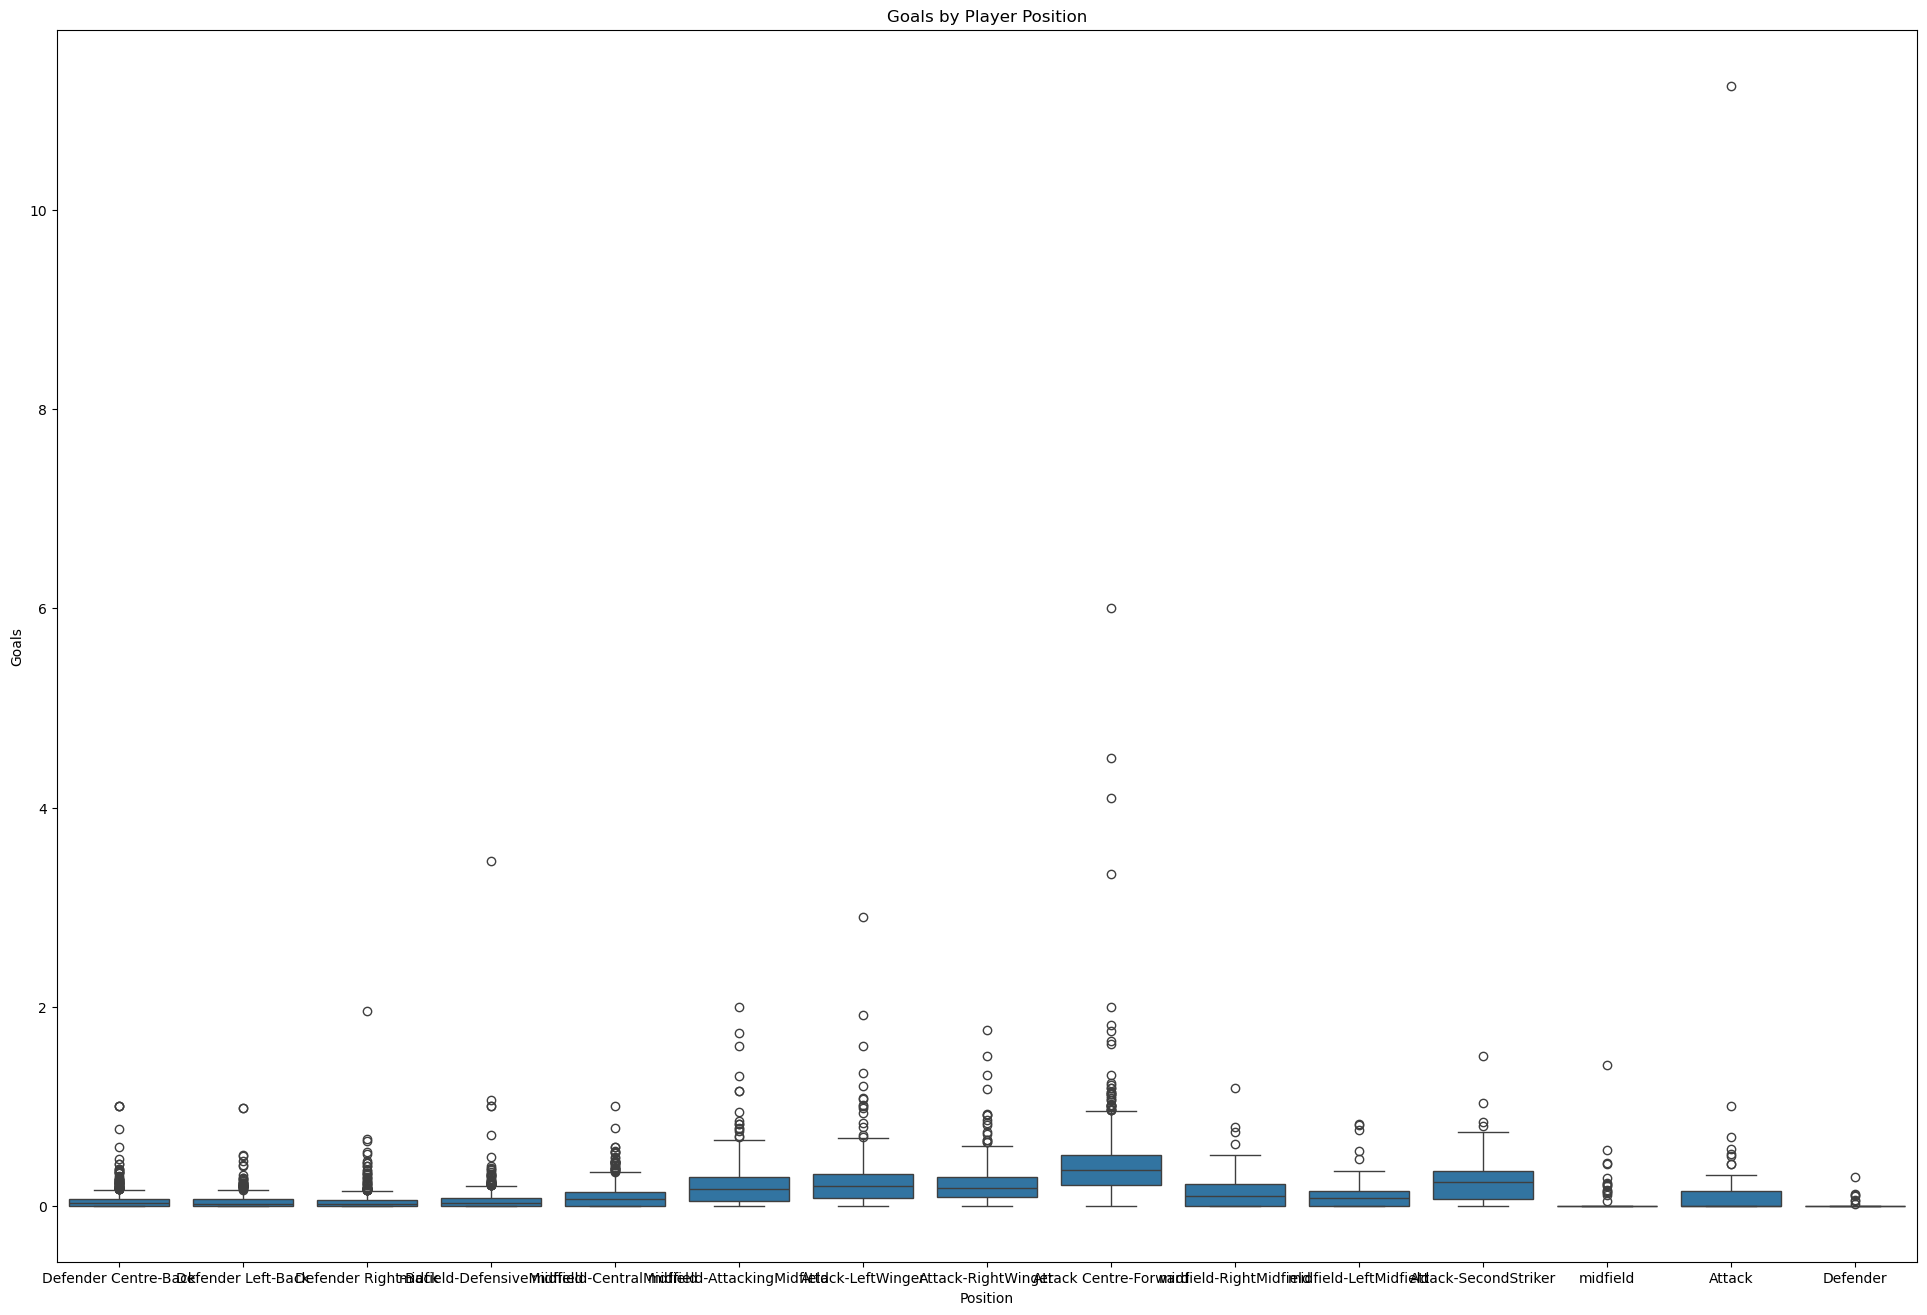

In [39]:
# 6. Analyze the relationship between numerical and categorical features
plt.figure(figsize=(24, 16))
sns.boxplot(x='position', y='goals', data=df1)
plt.title('Goals by Player Position')
plt.xlabel('Position')
plt.ylabel('Goals')
plt.show()

In [41]:
# Investigate the top players based on performance metrics
top_players = df1.nlargest(15, 'goals')
print(top_players[['position', 'goals', 'assists', 'minutes played']])

                         position      goals   assists  minutes played
9239                       Attack  11.250000  0.000000               8
3799        Attack Centre-Forward   6.000000  0.000000              15
8547        Attack Centre-Forward   4.500000  0.000000              60
7596        Attack Centre-Forward   4.090909  0.000000              44
8843   midfield-DefensiveMidfield   3.461538  0.000000              26
8727        Attack Centre-Forward   3.333333  0.000000              27
8260            Attack-LeftWinger   2.903226  0.000000              31
3308        Attack Centre-Forward   2.000000  0.000000              45
10666  midfield-AttackingMidfield   2.000000  0.000000              45
7636          Defender Right-Back   1.956522  1.956522              46
3664            Attack-LeftWinger   1.914894  0.000000              47
3172        Attack Centre-Forward   1.818182  0.000000              99
6960           Attack-RightWinger   1.764706  1.764706             102
8694  

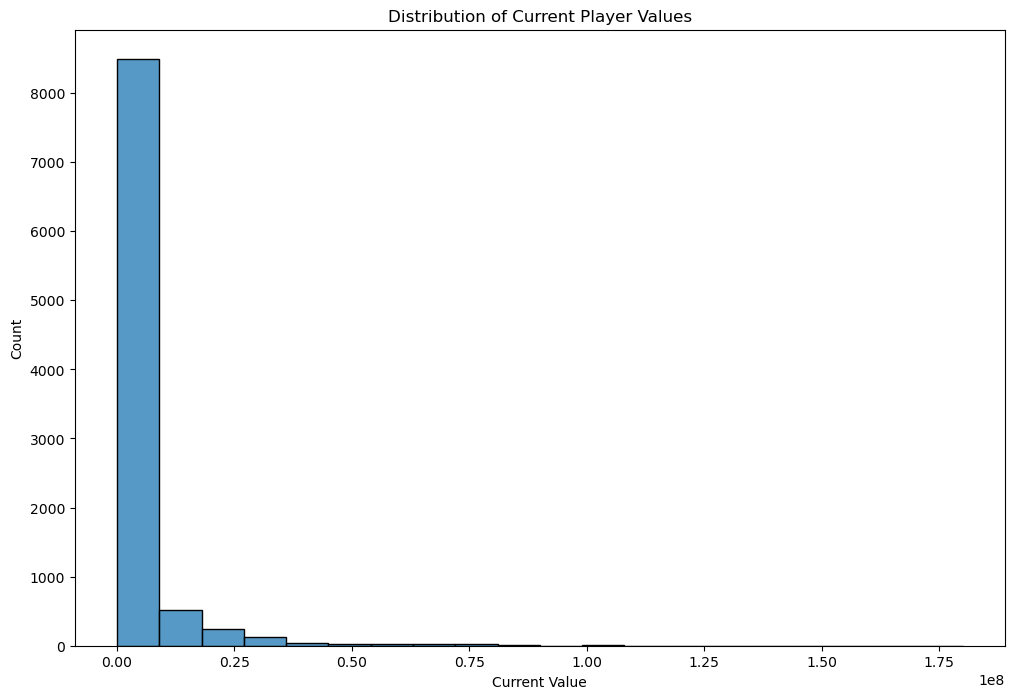

In [43]:
# Analyze the distribution of player values
plt.figure(figsize=(12, 8))
sns.histplot(df1['current_value'], bins=20)
plt.title('Distribution of Current Player Values')
plt.xlabel('Current Value')
plt.ylabel('Count')
plt.show()

In [45]:
# Calculate the outliers for the numerical features (excluding 'current_value')
numerical_features = df1.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove('current_value')

for feature in numerical_features:
    mean = df1[feature].mean()
    std = df1[feature].std()
    threshold = 3
    
    outliers = df1[(df1[feature] < mean - threshold * std) | (df1[feature] > mean + threshold * std)][feature]
    print(f"Outliers for '{feature}': {outliers.tolist()}")

Outliers for 'height': [206.0, 160.0, 160.0, 160.0, 202.0, 160.0, 202.0, 160.0, 202.0, 160.0, 160.0, 156.0, 160.0, 160.0, 159.0, 160.0, 160.0, 160.0, 160.0, 202.0, 160.0, 160.0]
Outliers for 'age': [41.0, 40.0, 41.0, 40.0, 40.0, 40.0, 40.0, 40.0, 42.0, 40.0, 40.0, 43.0, 40.0]
Outliers for 'appearance': []
Outliers for 'goals': [1.118269673, 0.881153114, 1.177927131, 0.91234347, 0.964974982, 1.015625, 0.894039735, 0.938442211, 1.304347826, 1.153846154, 0.963081862, 1.099236641, 1.818181818, 1.651376147, 0.97826087, 2.0, 0.940766551, 0.947368421, 1.232876712, 1.914893617, 1.0, 0.882352941, 0.927835052, 1.317073171, 0.9375, 1.119751166, 6.0, 1.14633456, 1.010682005, 1.084337349, 0.903284672, 1.619537275, 0.938981979, 0.967741935, 0.936639118, 1.058823529, 0.909090909, 0.935064935, 1.171875, 1.184210526, 0.97826087, 1.764705882, 1.417322835, 1.0, 0.916496945, 1.011235955, 1.317073171, 0.966010733, 4.090909091, 0.935064935, 1.956521739, 1.0, 1.071428571, 1.139240506, 1.065088757, 2.90322580

In [47]:
# Handle outliers
from scipy.stats import zscore
z = abs(zscore(df1[['height','goals', 'assists', 'yellow cards','yellow cards', 'days_injured', 'games_injured', 'award', 'highest_value']]))
df1_clean = df1[(z < 3).all(axis=1)]

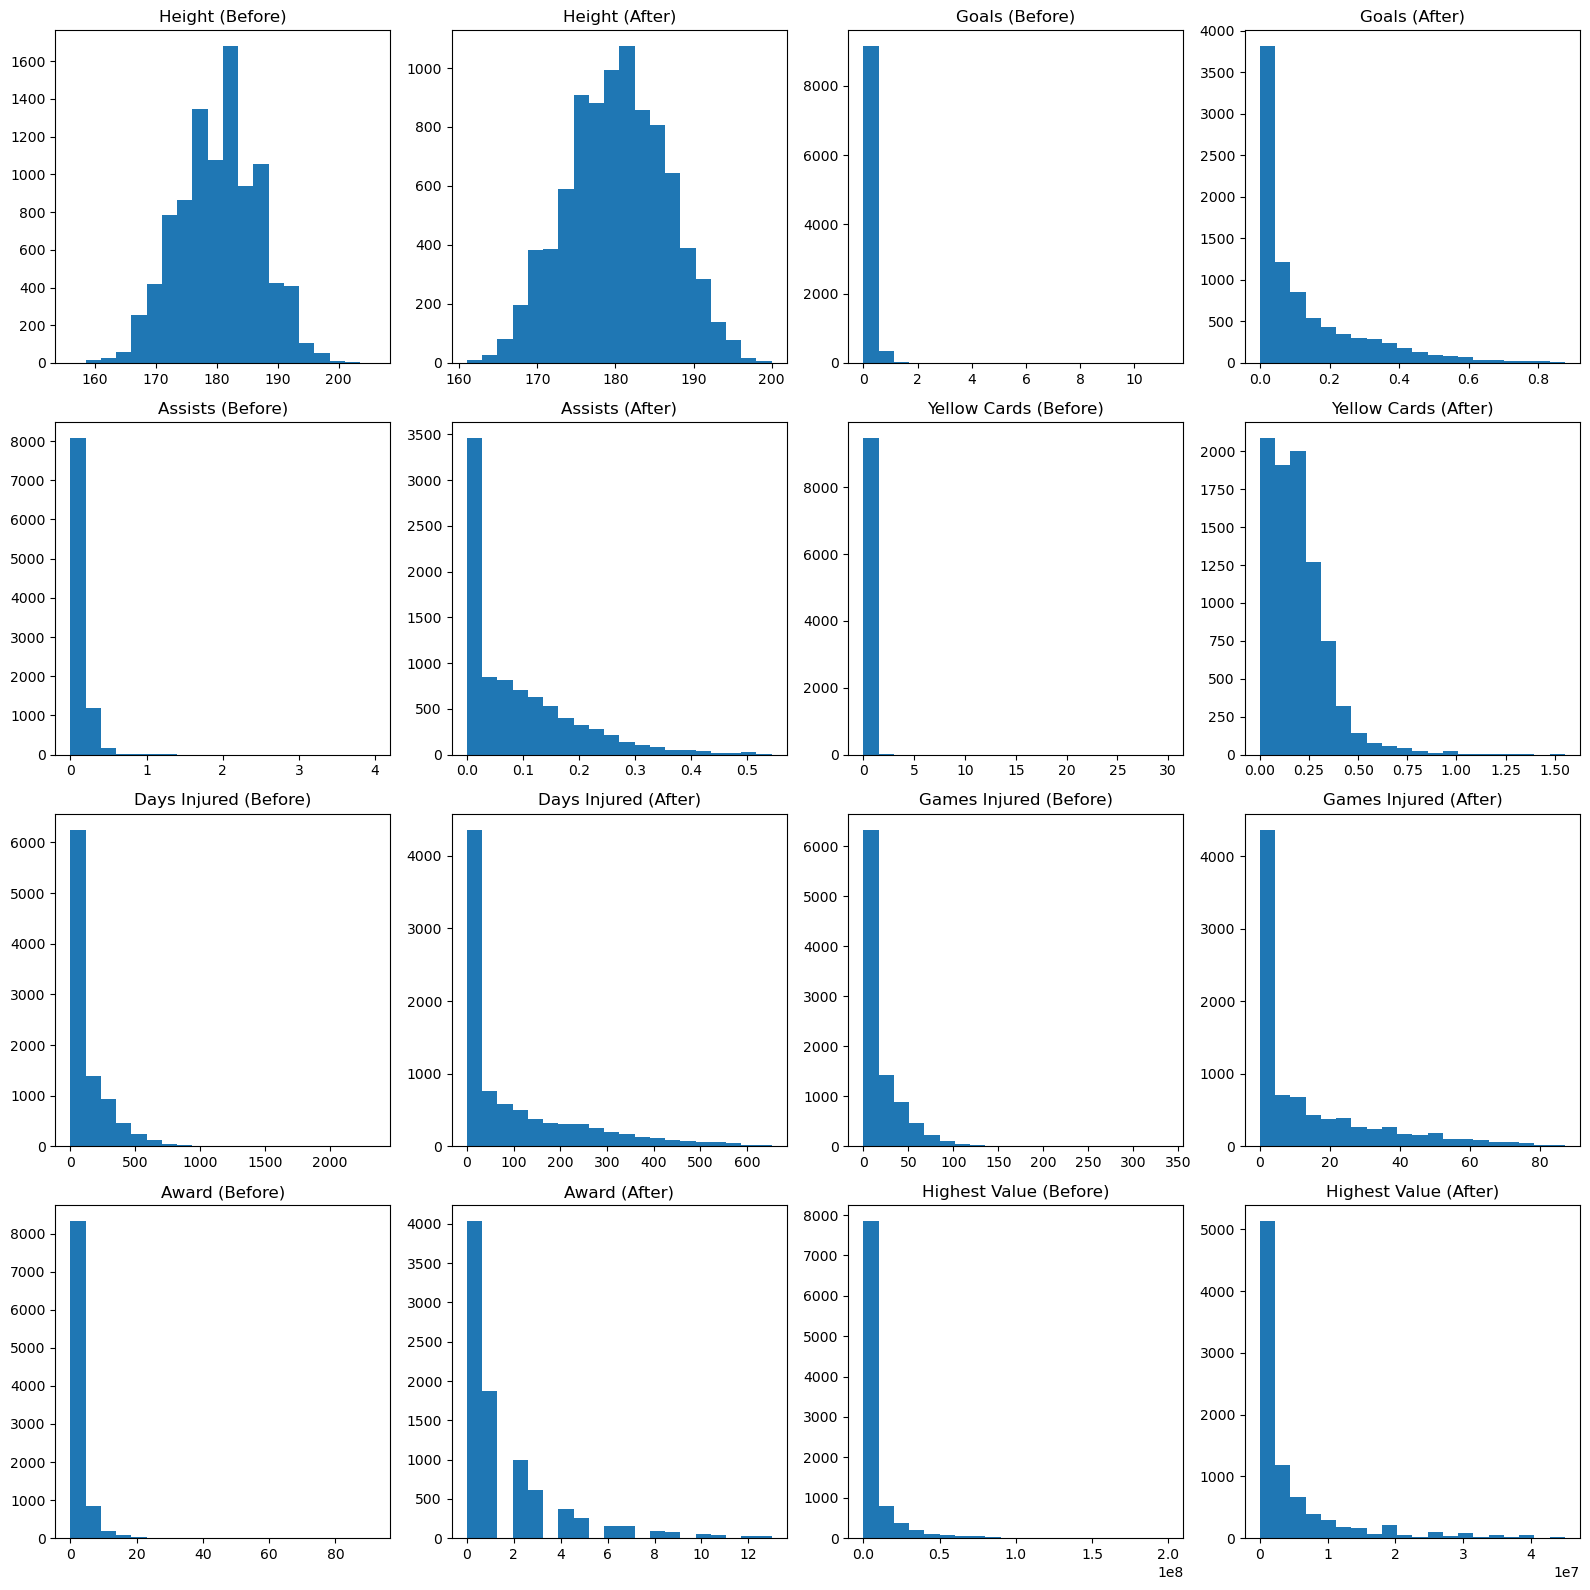

In [49]:
# Create the comparative histograms
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

# Height
axes[0, 0].hist(df1['height'], bins=20)
axes[0, 0].set_title('Height (Before)')
axes[0, 1].hist(df1_clean['height'], bins=20)
axes[0, 1].set_title('Height (After)')

# Goals
axes[0, 2].hist(df1['goals'], bins=20)
axes[0, 2].set_title('Goals (Before)')
axes[0, 3].hist(df1_clean['goals'], bins=20)
axes[0, 3].set_title('Goals (After)')

# Assists
axes[1, 0].hist(df1['assists'], bins=20)
axes[1, 0].set_title('Assists (Before)')
axes[1, 1].hist(df1_clean['assists'], bins=20)
axes[1, 1].set_title('Assists (After)')

# Yellow Cards
axes[1, 2].hist(df1['yellow cards'], bins=20)
axes[1, 2].set_title('Yellow Cards (Before)')
axes[1, 3].hist(df1_clean['yellow cards'], bins=20)
axes[1, 3].set_title('Yellow Cards (After)')

# Days Injured
axes[2, 0].hist(df1['days_injured'], bins=20)
axes[2, 0].set_title('Days Injured (Before)')
axes[2, 1].hist(df1_clean['days_injured'], bins=20)
axes[2, 1].set_title('Days Injured (After)')

# Games Injured
axes[2, 2].hist(df1['games_injured'], bins=20)
axes[2, 2].set_title('Games Injured (Before)')
axes[2, 3].hist(df1_clean['games_injured'], bins=20)
axes[2, 3].set_title('Games Injured (After)')

# Award
axes[3, 0].hist(df1['award'], bins=20)
axes[3, 0].set_title('Award (Before)')
axes[3, 1].hist(df1_clean['award'], bins=20)
axes[3, 1].set_title('Award (After)')

# Highest Value
axes[3, 2].hist(df1['highest_value'], bins=20)
axes[3, 2].set_title('Highest Value (Before)')
axes[3, 3].hist(df1_clean['highest_value'], bins=20)
axes[3, 3].set_title('Highest Value (After)')

plt.tight_layout()
plt.show()

In [51]:
df1_clean.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
6,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,0.0,0.0,5471,95,19,10,15000000,35000000,2,0
8,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,0.0,0.0,2758,47,13,0,2000000,2000000,2,0
9,Manchester United,Luke Shaw,Defender Left-Back,178.0,27.0,74,0.015374,0.169115,0.353604,0.0,0.0,5854,443,70,4,35000000,42000000,2,1
10,Manchester United,Tyrell Malacia,Defender Left-Back,169.0,23.0,89,0.012619,0.063096,0.227145,0.0,0.0,7132,182,15,3,22000000,22000000,2,1
11,Manchester United,Brandon Williams,Defender Left-Back,180.0,22.0,34,0.000000,0.033507,0.335071,0.0,0.0,2686,175,28,1,10000000,12000000,2,1


In [53]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8752 entries, 6 to 10753
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 8752 non-null   object 
 1   name                 8752 non-null   object 
 2   position             8752 non-null   object 
 3   height               8752 non-null   float64
 4   age                  8752 non-null   float64
 5   appearance           8752 non-null   int64  
 6   goals                8752 non-null   float64
 7   assists              8752 non-null   float64
 8   yellow cards         8752 non-null   float64
 9   second yellow cards  8752 non-null   float64
 10  red cards            8752 non-null   float64
 11  minutes played       8752 non-null   int64  
 12  days_injured         8752 non-null   int64  
 13  games_injured        8752 non-null   int64  
 14  award                8752 non-null   int64  
 15  current_value        8752 non-null   int64

In [55]:
# Convert categorical variables to numerical
le = LabelEncoder()
df1_clean['team_encoded'] = le.fit_transform(df1_clean['team'])

C:\Users\emre_\AppData\Local\Temp\ipykernel_12812\3251926982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean['team_encoded'] = le.fit_transform(df1_clean['team'])


In [57]:
df1_clean.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,team_encoded
6,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,0.0,0.0,5471,95,19,10,15000000,35000000,2,0,226
8,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,0.0,0.0,2758,47,13,0,2000000,2000000,2,0,226
9,Manchester United,Luke Shaw,Defender Left-Back,178.0,27.0,74,0.015374,0.169115,0.353604,0.0,0.0,5854,443,70,4,35000000,42000000,2,1,226
10,Manchester United,Tyrell Malacia,Defender Left-Back,169.0,23.0,89,0.012619,0.063096,0.227145,0.0,0.0,7132,182,15,3,22000000,22000000,2,1,226
11,Manchester United,Brandon Williams,Defender Left-Back,180.0,22.0,34,0.000000,0.033507,0.335071,0.0,0.0,2686,175,28,1,10000000,12000000,2,1,226


In [61]:
 #Split the dataset
features = df1_clean[['highest_value', 'appearance', 'minutes played', 'award', 'assists', 'goals','position_encoded', 'team_encoded']]
target = df1_clean['current_value']
X =  features
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
# Train a decision tree regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_scaled, y_train)
# Evaluate the model
y_pred = dt_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 13967556753283.84
R-squared: 0.57


In [67]:
# Prepare the data
features = df1_clean[['highest_value', 'appearance', 'minutes played', 'award', 'assists', 'goals','position_encoded', 'team_encoded']]
target = df1_clean['current_value']
X = features
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Cost-Complexity Pruning (Post-Pruning)

# Train an initial, unpruned tree
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

# Perform cost-complexity pruning
path = dt_reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Create a list of models with different levels of pruning
models = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    models.append(dt)

In [69]:
# Evaluate the models and select the best one
mse_values = []
r2_values = []
for model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

best_idx = r2_values.index(max(r2_values))
best_model = models[best_idx]
print(f'Best Model MSE: {mse_values[best_idx]:.2f}')
print(f'Best Model R-squared: {r2_values[best_idx]:.2f}')

Best Model MSE: 8513281671558.86
Best Model R-squared: 0.74


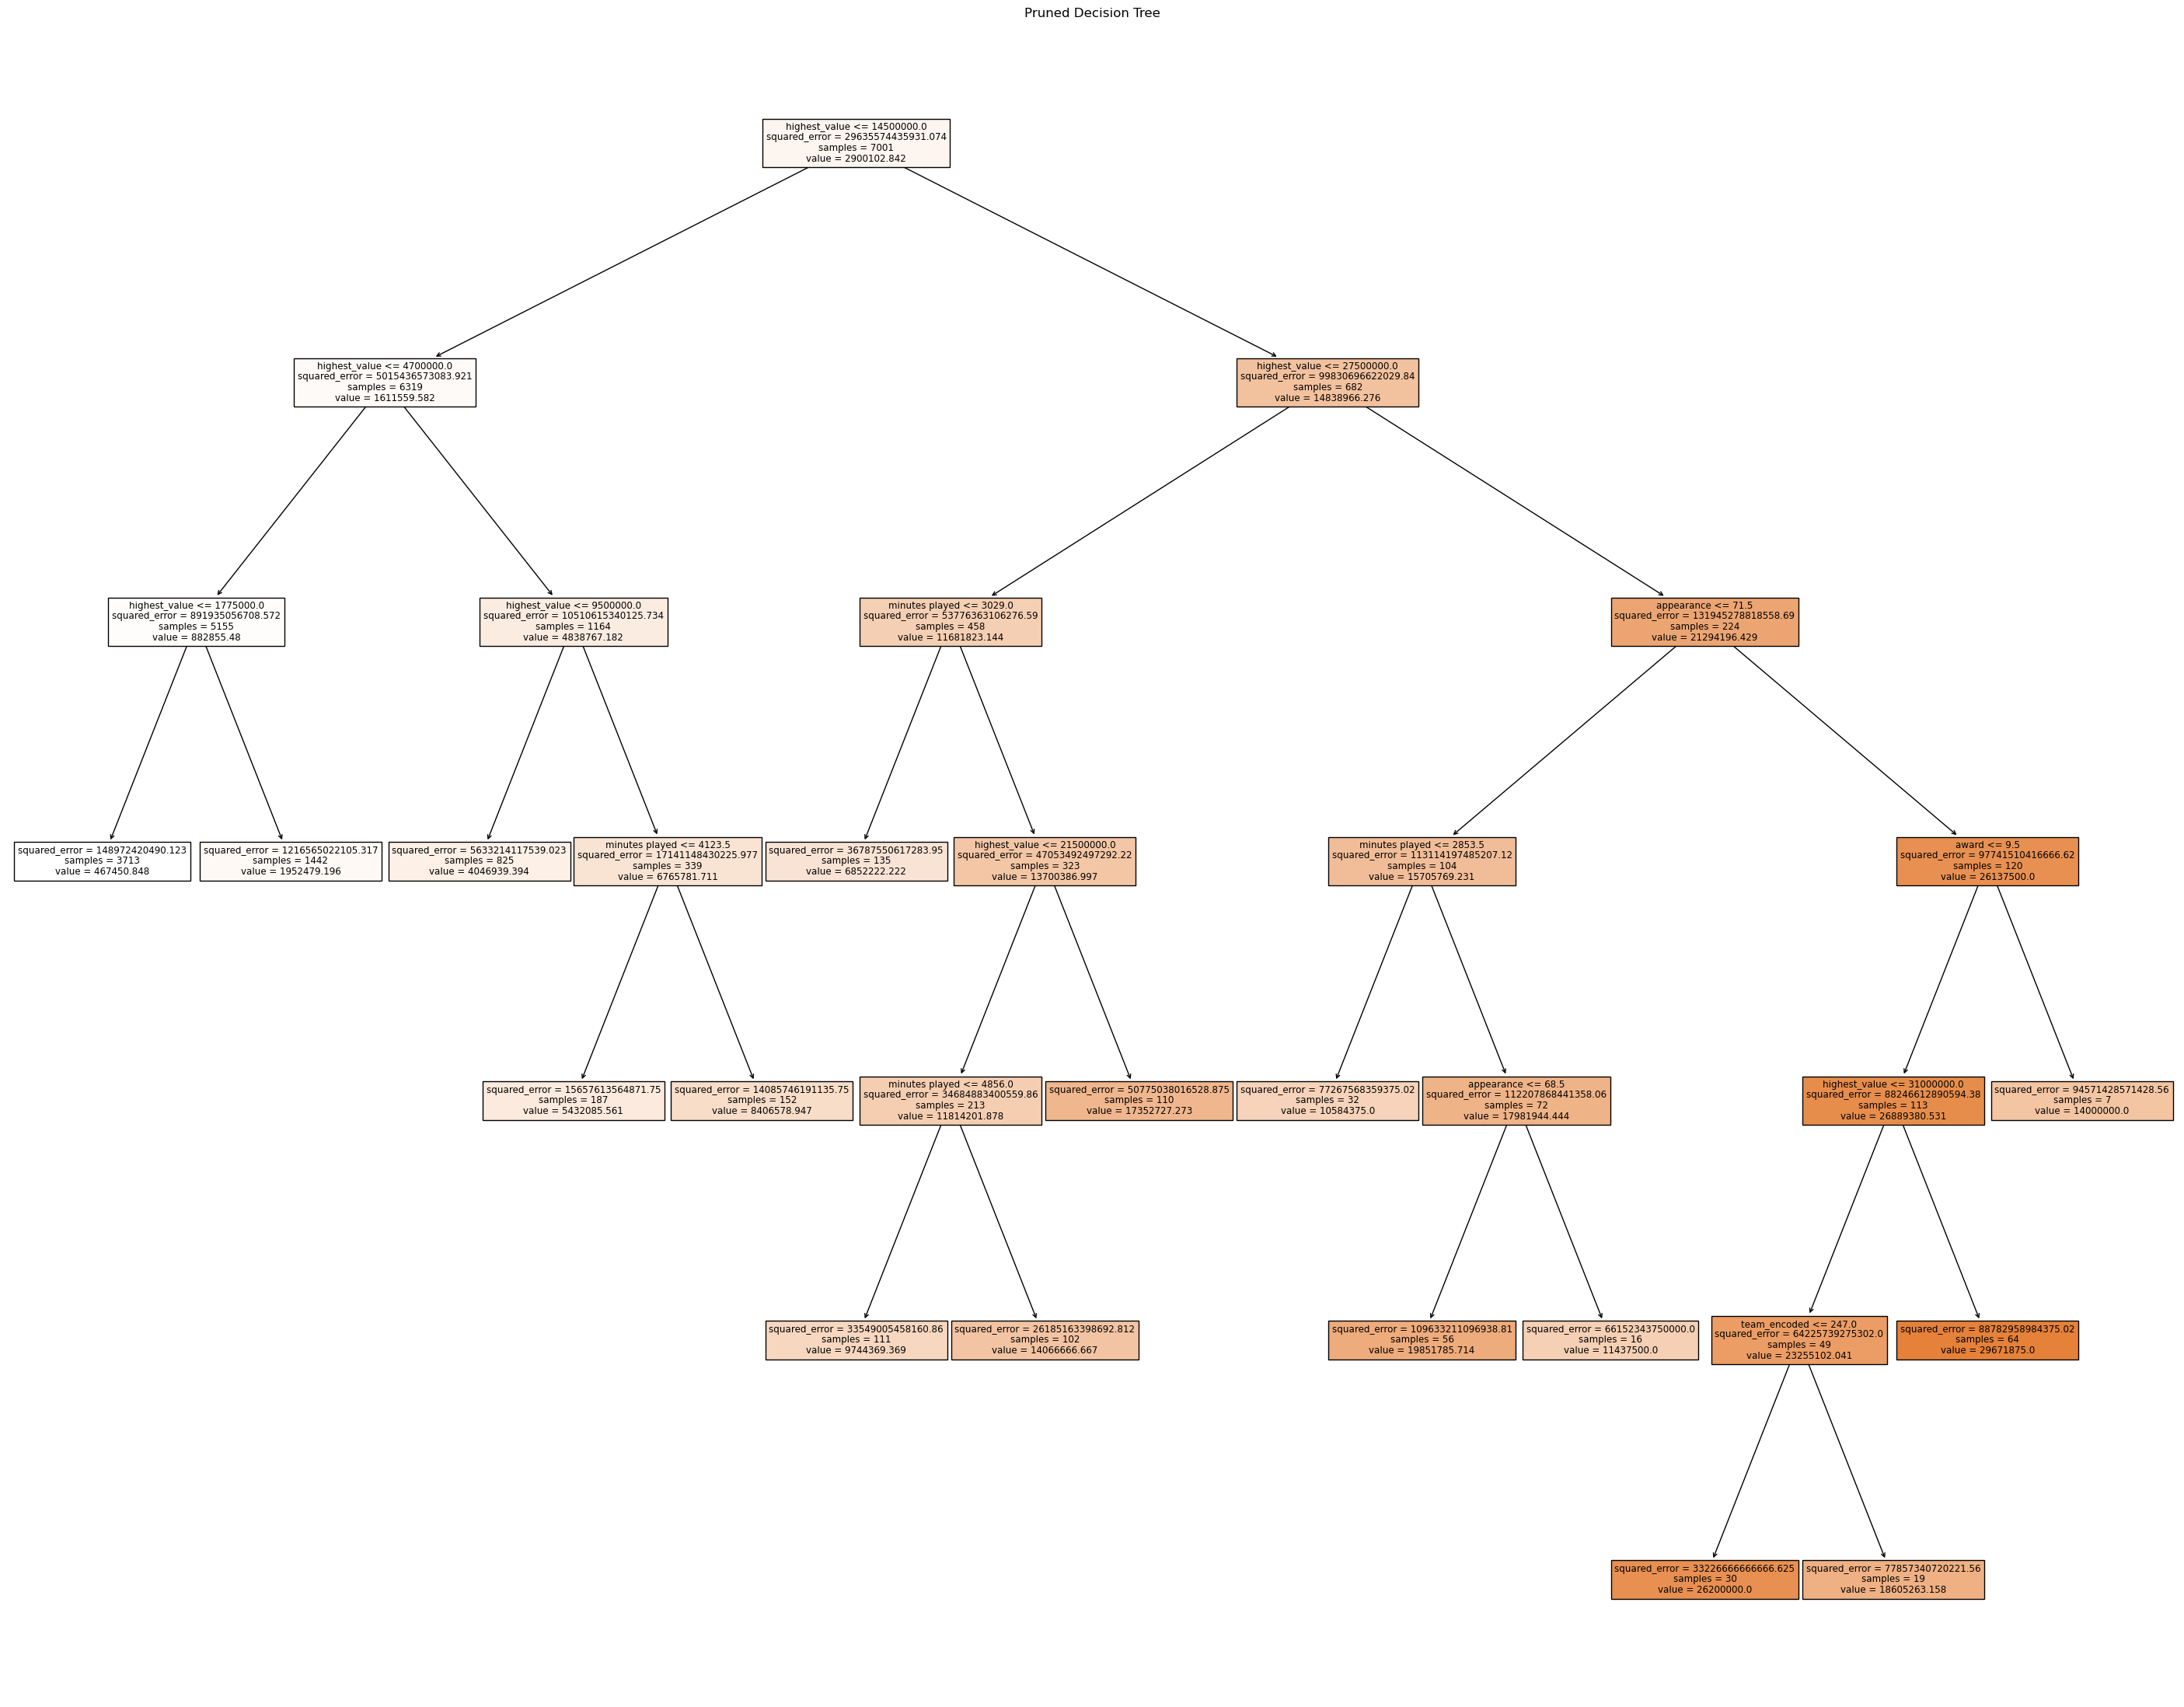

In [71]:
# Visualize the best model
plt.figure(figsize=(36, 28))
plot_tree(best_model, feature_names=features.columns, filled=True)
plt.title('Pruned Decision Tree')
plt.show()

Feature 0: highest_value - Importance: 0.8992
Feature 1: appearance - Importance: 0.0434
Feature 2: minutes played - Importance: 0.0463
Feature 3: award - Importance: 0.0068
Feature 4: assists - Importance: 0.0000
Feature 5: goals - Importance: 0.0000
Feature 6: position_encoded - Importance: 0.0000
Feature 7: team_encoded - Importance: 0.0042


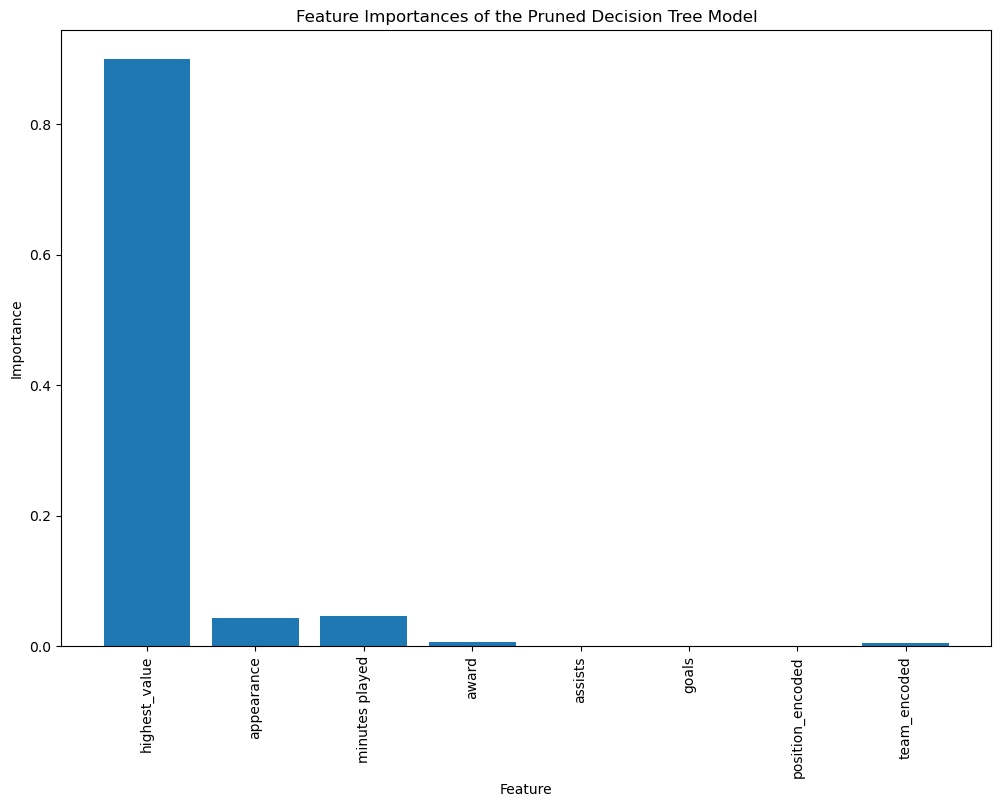

In [73]:
# Analyze the feature importance of the best pruned model
feature_importances = best_model.feature_importances_
feature_names = features.columns

# Print the feature importances
for i, (feature, importance) in enumerate(zip(feature_names, feature_importances)):
    print(f"Feature {i}: {feature} - Importance: {importance:.4f}")

# Visualize the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.title("Feature Importances of the Pruned Decision Tree Model")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [75]:
# Prepare the data
features = df1_clean[['highest_value', 'appearance', 'minutes played', 'award', 'assists', 'goals','position_encoded', 'team_encoded']]
target_log = np.log1p(df1_clean['current_value'])
X = features
y = target_log
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Cost-Complexity Pruning (Post-Pruning)

# Train an initial, unpruned tree
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

# Perform cost-complexity pruning
path = dt_reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Create a list of models with different levels of pruning
models = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    models.append(dt)

In [77]:
# Evaluate the models and select the best one
mse_values = []
r2_values = []
for model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

best_idx = r2_values.index(max(r2_values))
best_model = models[best_idx]

In [79]:
y_test_original = df1_clean.loc[X_test.index, 'current_value']
y_pred_original = np.expm1(best_model.predict(X_test))
mse_original = mean_squared_error(y_test_original, y_pred_original)
r2_original = r2_score(y_test_original, y_pred_original)
print(f'Mean Squared Error (original scale): {mse_original:.2f}')
print(f'R-squared (original scale): {r2_original:.2f}')

y_pred_log = best_model.predict(X_test)
mse_log = mean_squared_error(y_test, y_pred_log)
r2_log = r2_score(y_test, y_pred_log)
print(f'Mean Squared Error (log-transformed scale): {mse_log:.2f}')
print(f'R-squared (log-transformed scale): {r2_log:.2f}')

Mean Squared Error (original scale): 12377822268775.15
R-squared (original scale): 0.61
Mean Squared Error (log-transformed scale): 0.83
R-squared (log-transformed scale): 0.84
